In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.describe(include='all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,NaN
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,NaN
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,NaN


long_hair - categorical
forehead_width_cm - continuous
forehead_height_cm - continuous
nose_wide - categorical
nose_long - categorical
lips_thin - categorical
distance_nose_to_lip_long - categorical
gender - target

In [6]:
df.groupby('gender').count()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,2501,2501,2501,2501,2501,2501,2501
Male,2500,2500,2500,2500,2500,2500,2500


dataset is balanced

In [9]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

<Axes: xlabel='forehead_height_cm', ylabel='Count'>

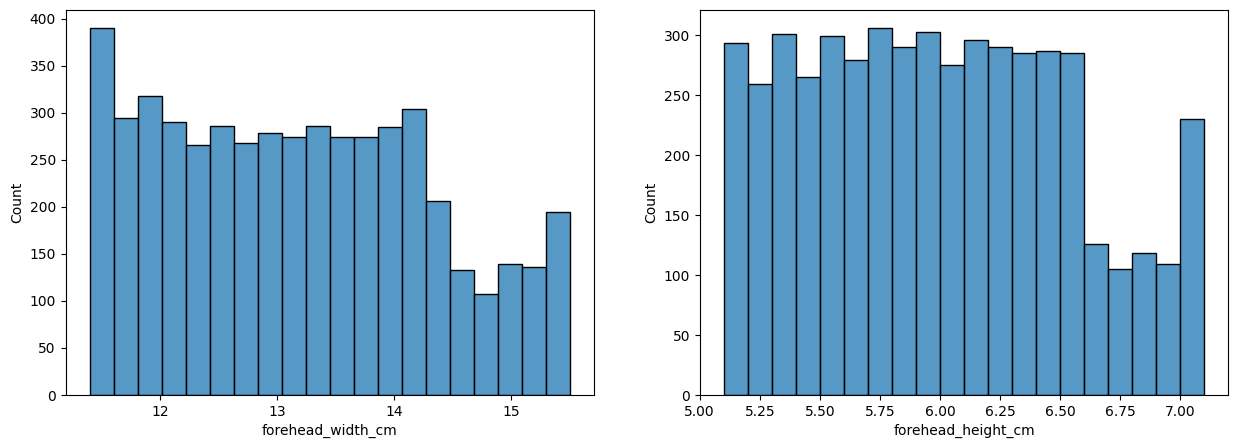

In [10]:
# check continuous variables first > forehead width and forehead height

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df['forehead_width_cm'], ax = ax1)
sns.histplot(df['forehead_height_cm'], ax = ax2)

<Axes: xlabel='gender', ylabel='forehead_height_cm'>

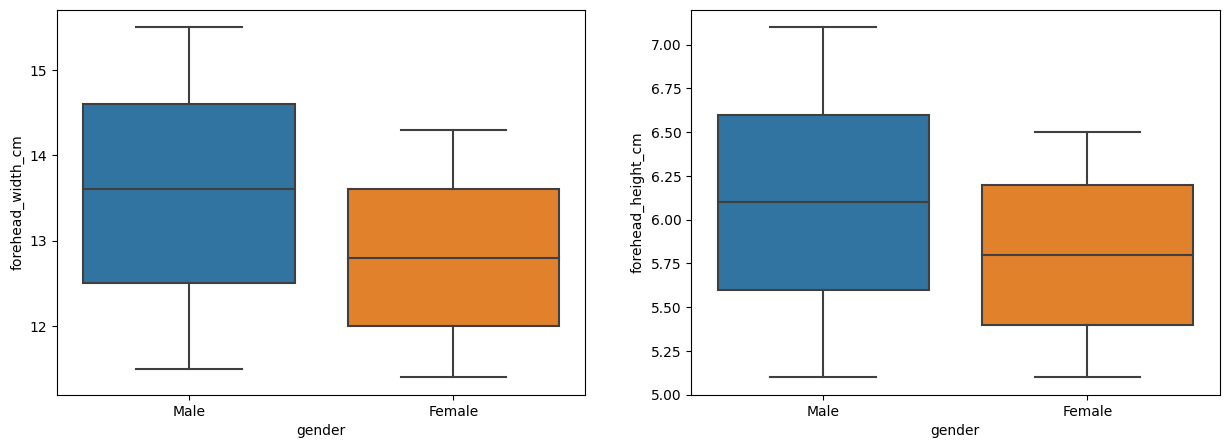

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y = 'forehead_width_cm', x = 'gender', data = df, ax = ax1)
sns.boxplot(y = 'forehead_height_cm', x = 'gender', data = df, ax = ax2)


In [12]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [14]:
df['ID'] = range(1, len(df) + 1)

In [16]:
df['ID'].sort_index()

0          1
1          2
2          3
3          4
4          5
        ... 
4996    4997
4997    4998
4998    4999
4999    5000
5000    5001
Name: ID, Length: 5001, dtype: int64

In [17]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,2
2,0,11.8,6.3,1,1,1,1,Male,3
3,0,14.4,6.1,0,1,1,1,Male,4
4,1,13.5,5.9,0,0,0,0,Female,5
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,4997
4997,1,11.9,5.4,0,0,0,0,Female,4998
4998,1,12.9,5.7,0,0,0,0,Female,4999
4999,1,13.2,6.2,0,0,0,0,Female,5000


In [18]:
df.groupby(['long_hair', 'gender'])['ID'].count().unstack()

gender,Female,Male
long_hair,,
0,317,335
1,2184,2165


In [19]:
df.groupby(['nose_wide', 'gender'])['ID'].count().unstack()

gender,Female,Male
nose_wide,,
0,2214,317
1,287,2183


In [20]:
df.groupby(['nose_long', 'gender'])['ID'].count().unstack()

gender,Female,Male
nose_long,,
0,2161,300
1,340,2200


In [21]:
df.groupby(['lips_thin', 'gender'])['ID'].count().unstack()

gender,Female,Male
lips_thin,,
0,2197,338
1,304,2162


In [22]:
df.groupby(['distance_nose_to_lip_long', 'gender'])['ID'].count().unstack()

gender,Female,Male
distance_nose_to_lip_long,,
0,2197,309
1,304,2191


In [23]:
df[df['gender']=='Male'].describe(include='all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500,2500.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500,NaN
mean,0.86600,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400,NaN,2477.235600
std,0.34072,1.187325,0.596306,0.332815,0.325027,0.342005,0.329191,NaN,1446.635997
min,0.00000,11.500000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,1.00000,12.500000,5.600000,1.000000,1.000000,1.000000,1.000000,NaN,1219.750000
50%,1.00000,13.600000,6.100000,1.000000,1.000000,1.000000,1.000000,NaN,2460.000000
75%,1.00000,14.600000,6.600000,1.000000,1.000000,1.000000,1.000000,NaN,3749.250000


In [24]:
df[df['gender']=='Female'].describe(include='all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501,2501.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501,NaN
mean,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551,NaN,2524.754898
std,0.332758,0.876703,0.430677,0.318789,0.342799,0.326832,0.326832,NaN,1440.874431
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000
25%,1.000000,12.000000,5.400000,0.000000,0.000000,0.000000,0.000000,NaN,1286.000000
50%,1.000000,12.800000,5.800000,0.000000,0.000000,0.000000,0.000000,NaN,2550.000000
75%,1.000000,13.600000,6.200000,0.000000,0.000000,0.000000,0.000000,NaN,3754.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
 8   ID                         5001 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 351.8+ KB


In [26]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,2
2,0,11.8,6.3,1,1,1,1,Male,3
3,0,14.4,6.1,0,1,1,1,Male,4
4,1,13.5,5.9,0,0,0,0,Female,5
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,4997
4997,1,11.9,5.4,0,0,0,0,Female,4998
4998,1,12.9,5.7,0,0,0,0,Female,4999
4999,1,13.2,6.2,0,0,0,0,Female,5000


In [27]:
df2 = df.copy()

In [28]:
df2.dropna(inplace=True)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
 8   ID                         5001 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 351.8+ KB


In [30]:
df2

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,2
2,0,11.8,6.3,1,1,1,1,Male,3
3,0,14.4,6.1,0,1,1,1,Male,4
4,1,13.5,5.9,0,0,0,0,Female,5
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,4997
4997,1,11.9,5.4,0,0,0,0,Female,4998
4998,1,12.9,5.7,0,0,0,0,Female,4999
4999,1,13.2,6.2,0,0,0,0,Female,5000


In [31]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(df2.iloc[:,:7], df2.iloc[:,7])

KNeighborsClassifier(n_neighbors=30)

In [32]:
pred = knn.predict(df2.iloc[:,:7])

In [33]:
print(accuracy_score(pred, df2.iloc[:,7]))

0.9750049990002


In [35]:
def recategorization(x):
    if x == 'Male':
        return 0
    elif x == 'Female':
        return 1

In [36]:
df2['gender'] = df2['gender'].apply(recategorization)
df2

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,ID
0,1,11.8,6.1,1,0,1,1,0,1
1,0,14.0,5.4,0,0,1,0,1,2
2,0,11.8,6.3,1,1,1,1,0,3
3,0,14.4,6.1,0,1,1,1,0,4
4,1,13.5,5.9,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1,4997
4997,1,11.9,5.4,0,0,0,0,1,4998
4998,1,12.9,5.7,0,0,0,0,1,4999
4999,1,13.2,6.2,0,0,0,0,1,5000


In [38]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(df2.iloc[:,:7], df2.iloc[:,7])
pred = knn.predict(df2.iloc[:,:7])
print(accuracy_score(pred, df2.iloc[:,7]))

0.9744051189762047


In [39]:
print(accuracy_score(pred, df2.iloc[:,7]))
print(f1_score(pred, df2.iloc[:,7]))
print(precision_score(pred, df2.iloc[:,7]))
print(recall_score(pred, df2.iloc[:,7]))

0.9744051189762047
0.9747135519557487
0.98640543782487
0.9632955876610699


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [41]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:7], df2.iloc[:,7], test_size=0.3, random_state=123)

In [43]:
log.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC()

In [44]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [45]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.9647696476964769
0.9682217714672076
0.9663978494623655
0.9723905723905725


In [60]:
print(precision_score(pred_l, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))

0.9582772543741588
0.9636608344549125
0.9676985195154778
0.971736204576043


In [48]:
pred_l_prob = log.predict_proba(X_test)
pred_l_prob

array([[9.78663396e-01, 2.13366044e-02],
       [9.99910250e-01, 8.97496054e-05],
       [7.45559589e-01, 2.54440411e-01],
       ...,
       [3.66918274e-02, 9.63308173e-01],
       [9.99914491e-01, 8.55088606e-05],
       [9.99862924e-01, 1.37076239e-04]])

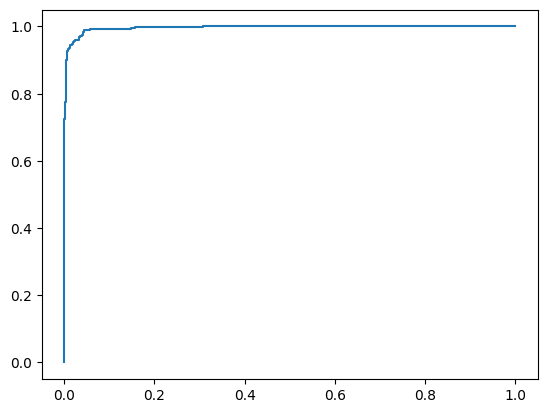

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])
plt.plot(fpr, tpr)

In [50]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans.max()

0.972048699466031

In [51]:
np.argmax(gmeans)

218

In [52]:
thresholds[np.argmax(gmeans)]

0.2995576097387423

In [63]:
knn_params = {'n_neighbors':range(3,500)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=200, cv=10, scoring='precision')
rs_knn.fit(X_train, y_train)
rs_knn.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [65]:
svc_params = {'kernel':['linear','poly', 'rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=5, cv=10, scoring='precision')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(kernel='poly')

In [66]:
svc_best = SVC(kernel = 'poly')
knn_best = KNeighborsClassifier(n_neighbors=8)

svc_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)

pred_svc_best = svc_best.predict(X_test)
pred_knn_best = knn_best.predict(X_test)

print(precision_score(pred_svc_best, y_test))
print(precision_score(pred_knn_best, y_test))

0.9407806191117093
0.9582772543741588


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)